1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [4]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [5]:
import pandas as pd
filename= "./data/data_000637.txt" ##setting the filename
n=10000 
dataset= pd.read_csv(filename,nrows=n) ##pandas function to read a .csv file
print(dataset)


      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0        1     0          123  3869200167        2374        26
1        1     0          124  3869200167        2374        27
2        1     0           63  3869200167        2553        28
3        1     0           64  3869200167        2558        19
4        1     0           64  3869200167        2760        25
...    ...   ...          ...         ...         ...       ...
9995     1     0           61  3869200267         696        11
9996     1     0           60  3869200267         701         5
9997     1     0           59  3869200267         707        23
9998     1     0           63  3869200267         706        15
9999     1     0           49  3869200267         777        13

[10000 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [6]:
x=dataset["BX_COUNTER"].max() ## accessing to the column and then applying the max() function
print("The max of BX_COUNTER is:", x)

The max of BX_COUNTER is: 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [7]:
absolute_times=[] ##empty list
for i,row in dataset.iterrows():
    time= (row["TDC_MEAS"]*25/30+ row["BX_COUNTER"]*25+ row["ORBIT_CNT"]*x*25) ##applying the definitions
    absolute_times.append(time) ##adding the element to the list
dataset["ABS_TIMES"]=absolute_times ## new column in the dataset
print("Dataset with new column:\n",dataset)
import datetime
time_series=pd.to_datetime(dataset["ABS_TIMES"], unit="ns")
print("The time series are:\n",time_series)

Dataset with new column:
       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS     ABS_TIMES
0        1     0          123  3869200167        2374        26  3.446490e+14
1        1     0          124  3869200167        2374        27  3.446490e+14
2        1     0           63  3869200167        2553        28  3.446490e+14
3        1     0           64  3869200167        2558        19  3.446490e+14
4        1     0           64  3869200167        2760        25  3.446490e+14
...    ...   ...          ...         ...         ...       ...           ...
9995     1     0           61  3869200267         696        11  3.446490e+14
9996     1     0           60  3869200267         701         5  3.446490e+14
9997     1     0           59  3869200267         707        23  3.446490e+14
9998     1     0           63  3869200267         706        15  3.446490e+14
9999     1     0           49  3869200267         777        13  3.446490e+14

[10000 rows x 7 columns]
The time ser

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [14]:
dataset= pd.read_csv(filename) ##reading the entire file
absolute_times=[]
for i,row in dataset.iterrows():
    time= (row["TDC_MEAS"]*25/30+ row["BX_COUNTER"]*25+ row["ORBIT_CNT"]*x*25) ##applying the definitions
    absolute_times.append(time)  ##same proceduire as before
    
dataset['ABS_TIME'] = pd.to_timedelta(absolute_times) ## computing the duration
print("The duration required is:\n",dataset.head(20)) ##showing first 20 entries


The duration required is:
     HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0      1     0          123  3869200167        2374        26   
1      1     0          124  3869200167        2374        27   
2      1     0           63  3869200167        2553        28   
3      1     0           64  3869200167        2558        19   
4      1     0           64  3869200167        2760        25   
5      1     0           63  3869200167        2762         4   
6      1     0           61  3869200167        2772        14   
7      1     0          139  3869200167        2776         0   
8      1     0           62  3869200167        2774        21   
9      1     0           60  3869200167        2788         7   
10     1     1            7  3869200167        2785         4   
11     1     0           64  3869200167        2786        19   
12     1     1            6  3869200167        2792        18   
13     1     0           36  3869200167        2791        23  

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [9]:
count=dataset.groupby("TDC_CHANNEL").count() ##counting the iterations of TDC channels
n=3  
noisy=count.sort_values(by="HEAD",ascending=False).iloc[0:n] ##selecting how many channels to show
print(noisy)

               HEAD    FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS  ABS_TIME
TDC_CHANNEL                                                           
139          108059  108059     108059      108059    108059    108059
64            66020   66020      66020       66020     66020     66020
63            64642   64642      64642       64642     64642     64642


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [10]:
print("The non empty orbits are:",len(dataset.groupby("ORBIT_CNT").count()))

The non empty orbits are: 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [11]:
print("The orbits with at least one measurament with TDC_CHANNEL=139 are:",len(dataset[dataset["TDC_CHANNEL"]==139].groupby("ORBIT_CNT").count()))

The orbits with at least one measurament with TDC_CHANNEL=139 are: 10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [12]:
##there are two FPGAs, one identified with 0 the other one with 1
fpga_0 = pd.Series(dataset[dataset['FPGA']==0]['TDC_CHANNEL'].value_counts()) ##selecting FPGA with number 0 and counting each instance of TDC_CHANNEL value
fpga_1 = pd.Series(dataset[dataset['FPGA']==1]['TDC_CHANNEL'].value_counts()) ##selecting FPGA with number 1 and counting each instance of TDC_CHANNEL value
print("The FPGA identified with 0:\n", fpga_0)



The FPGA identified with 0:
 139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0.5, 0, 'Count')

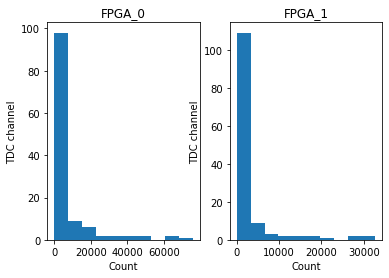

In [13]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ) = plt.subplots(1, 2,)

ax1.hist(fpga_0) ##create histogtram
ax1.set_title('FPGA_0')
ax1.set_ylabel('TDC channel')
ax1.set_xlabel('Count')

ax2.hist(fpga_1)
ax2.set_title('FPGA_1')
ax2.set_ylabel('TDC channel')
ax2.set_xlabel('Count')

